# Optimización de Portafolio de Inversión

**Integrantes**:

1. Miguel de Jesús Aguirre Orozco

2. Berlín Preciado Escalera

3. Miriam Eunice Rosas Medellín

**Profesor**: Alberto Arjona

**Materia**: Simulación Matemática

**Ciclo**: Verano 2019

**Carrera**: Ingeniería Financiera

**Escuela**: Departamento de Matemáticas y Física (DMAF) del Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO), A.C.

## Primera Parte: Selección de Activos

Utilizamos el inspector de acciones de Yahoo Finanzas para ver cual es el top 10 de firmas con mayor rendimiento en la región de México. Las empresas que resulten las someteremos a una simulación de probabilidad precio umbral para descartar la mitad y finalmente poder seleccionar las cinco acciones en específico que contendrá nuestra cartera de inversión. La lista es la siguiente.

1. Cigna Corporation (7.44%)
2. Volkswagen AG (7.39%)
3. Itaú Unibanco Holding S.A. (5.21%)
4. Nemak, S. A. B. de C. V. (4.48%)
5. Ross Stores, Inc. (4.18%)
6. Caterpillar Inc. (3.93%)
7. Nokia Corporation (3.57%)
8. Walmart Inc.(3.49%)
9. Controladora Vuela Compañía de Aviación, S.A.B. de C.V. (3.48%)
10. Leidos Holdings, Inc. (3.43%)

Como queremos que nuestro portafolio de inversión tenga un vencimiento de cinco años, el análisis de la probabilidad precio umbral la realizaremos con los precios históricos de los últimos cinco años; es decir, desde el principio del 2013 hasta el final del 2018. Esto con el objetivo de evitar tendencias a corto plazo que podrían aparecer si sólo utilizamos los precios de uno o dos años.

**Nota**: Tuvimos que descartar dos de las empresas que se encontraban en el top 10 y reemplazarlas por el siguiente par debido a que por alguna razón, el código presentaba un error en las fechas de cierre que no pudimos remediar. Estas empresas eran INFOSYS LTD y Humana Inc.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
def get_historical_closes(ticker,start_date,end_date=None):
    closes=web.YahooDailyReader(ticker,start_date,end_date).read()
    return pd.DataFrame(closes.loc[:,"Adj Close"])
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
def daily_ret_sim(mu,sigma,ndays,ntraj,start_date):
    dates=pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays,ntraj)+mu,index=dates)

### Cigna Corporation

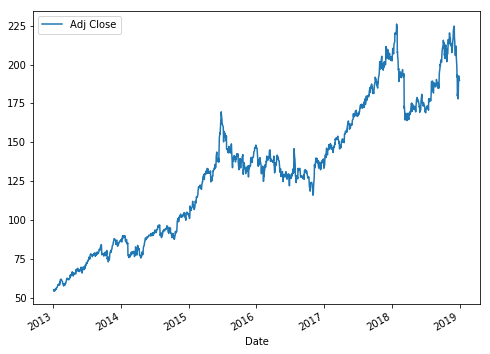

In [2]:
ticker="CI"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [3]:
closes.iloc[-1]

Adj Close    189.873627
Name: 2018-12-31 00:00:00, dtype: float64

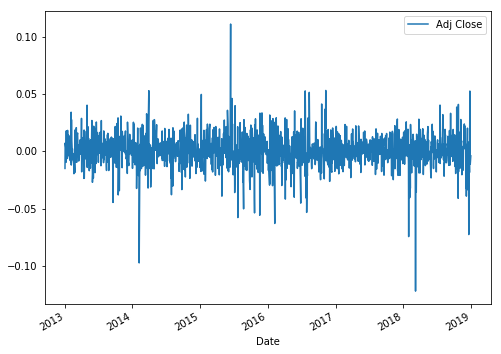

In [4]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [5]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0008208480754252479, 0.014894597478233948)

### Volkswagen AG

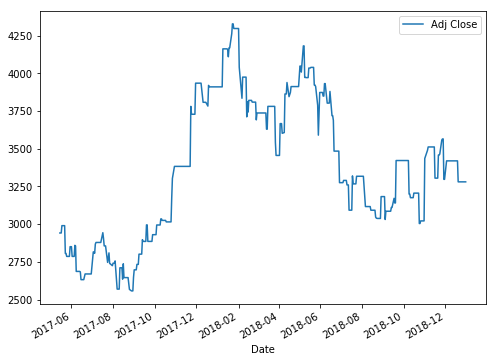

In [6]:
ticker="VOW3N.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [7]:
closes.iloc[-1]

Adj Close    3280.551025
Name: 2018-12-31 00:00:00, dtype: float64

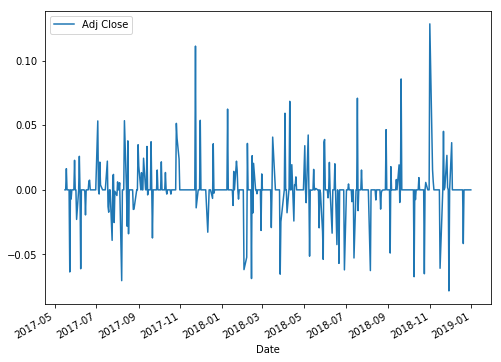

In [8]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [9]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.00026548638786011246, 0.02135695576969283)

### Itaú Unibanco Holding S.A.

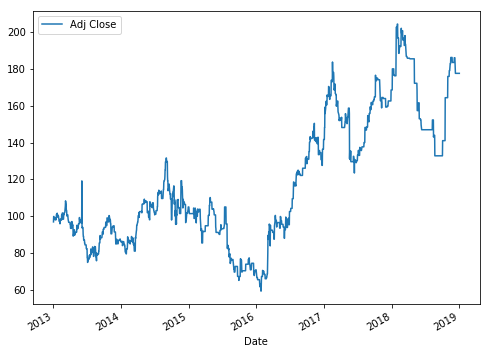

In [10]:
ticker="ITUBN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [11]:
closes.iloc[-1]

Adj Close    177.729767
Name: 2018-12-31 00:00:00, dtype: float64

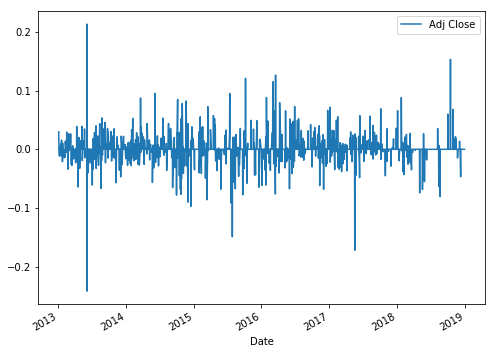

In [12]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [13]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004031992905986871, 0.02319616821837994)

### Nemak, S. A. B. de C. V.

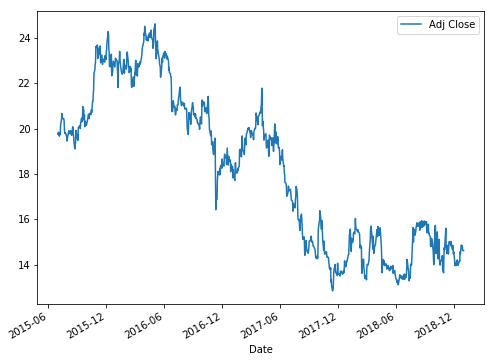

In [14]:
ticker="NEMAKA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [15]:
closes.iloc[-1]

Adj Close    14.620543
Name: 2018-12-31 00:00:00, dtype: float64

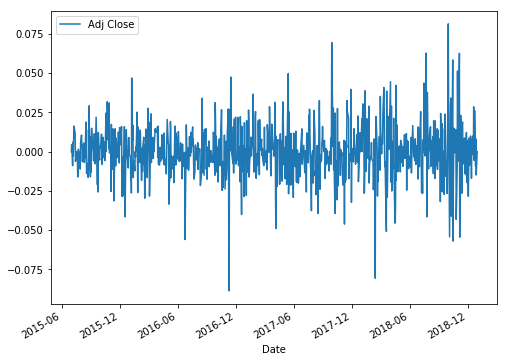

In [16]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [17]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(-0.00034163120118556393, 0.016954502369632043)

### Ross Stores, Inc.

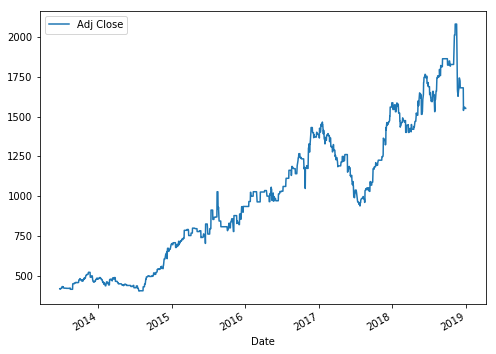

In [18]:
ticker="ROST.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [19]:
closes.iloc[-1]

Adj Close    1551.430054
Name: 2018-12-31 00:00:00, dtype: float64

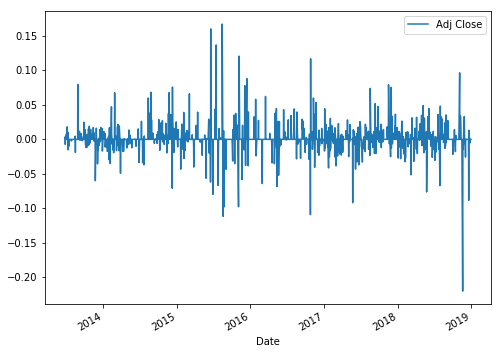

In [20]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [21]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0009438675083141927, 0.01947564147355173)

### Caterpillar Inc.

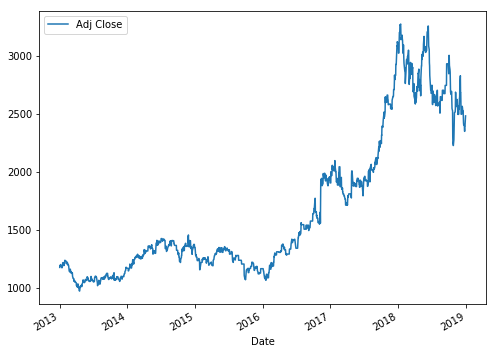

In [22]:
ticker="CAT.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [23]:
closes.iloc[-1]

Adj Close    2483.924072
Name: 2018-12-31 00:00:00, dtype: float64

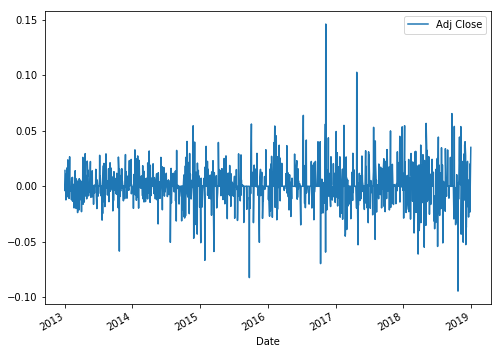

In [24]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [25]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004948162318665457, 0.01628708204289034)

### Nokia Corporation

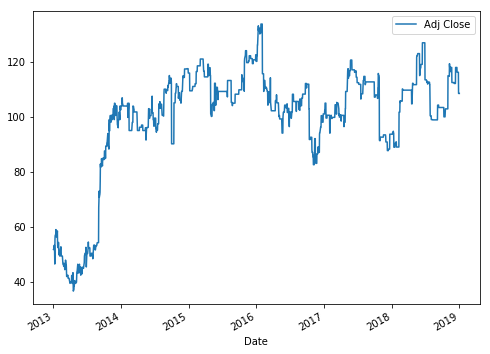

In [26]:
ticker="NOKN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [27]:
closes.iloc[-1]

Adj Close    108.53614
Name: 2018-12-31 00:00:00, dtype: float64

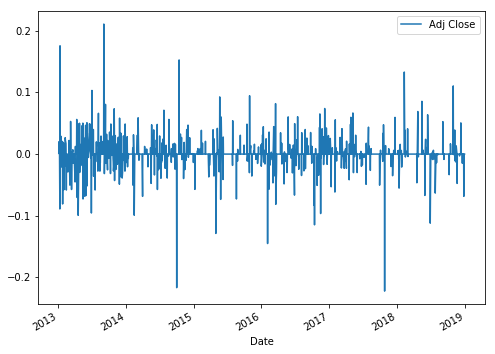

In [28]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [29]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0004903223305875184, 0.023481690880104704)

### Walmart Inc.

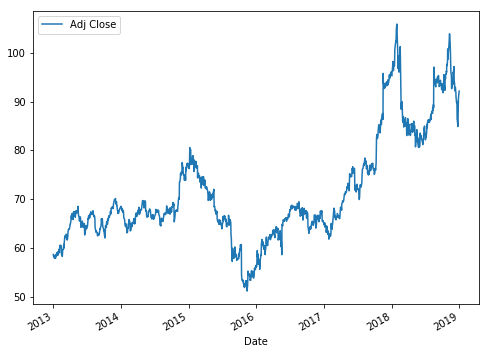

In [30]:
ticker="WMT"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [31]:
closes.iloc[-1]

Adj Close    92.161888
Name: 2018-12-31 00:00:00, dtype: float64

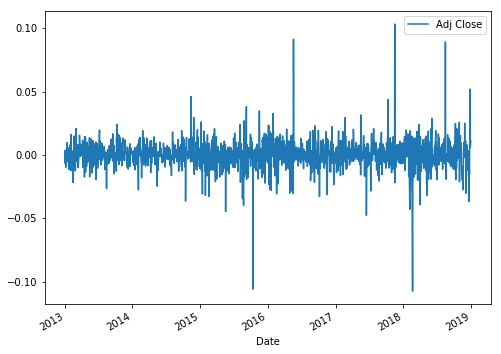

In [32]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [33]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0002986570242321939, 0.01159546461107912)

### Controladora Vuela Compañía de Aviación, S.A.B. de C.V.

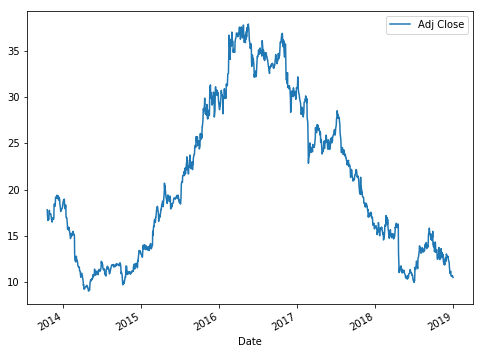

In [34]:
ticker="VOLARA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [35]:
closes.iloc[-1]

Adj Close    10.48
Name: 2018-12-31 00:00:00, dtype: float64

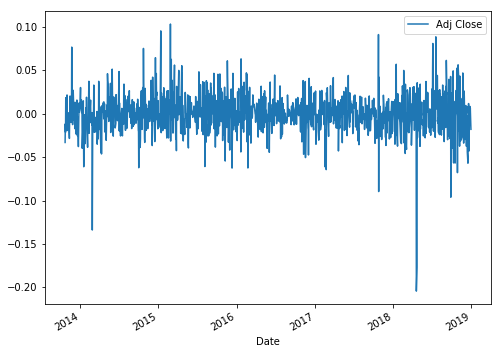

In [36]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [37]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(-0.00040685850938795685, 0.022634775203078366)

### Leidos Holdings, Inc

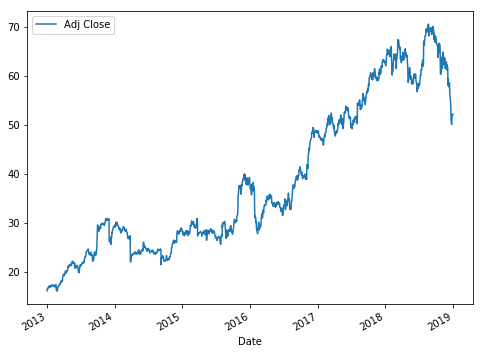

In [38]:
ticker="LDOS"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [39]:
closes.iloc[-1]

Adj Close    52.241898
Name: 2018-12-31 00:00:00, dtype: float64

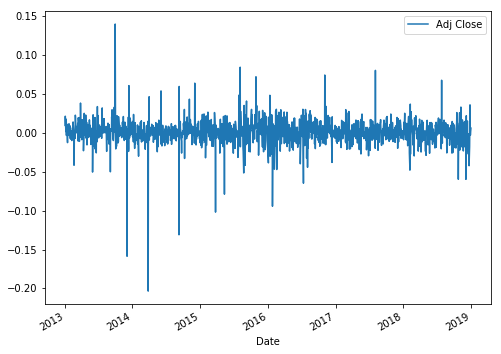

In [40]:
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [41]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]
mu,sigma

(0.0007814139770080142, 0.01694001501969712)

#### Fuente

https://es.finance.yahoo.com/screener/a288df9d-4ab8-4c26-ae31-cf0f95142d06